In [1]:
# Load the Numpy package, and rename to "np"
import numpy as np

### Iteration ###

It is often the case in programming – especially when dealing with randomness
– that we want to repeat a process multiple times.

We know the numpy function `random.randint` claims to choose randomly
between the integers in the range we specify.

We have been choosing randomly between 0 and 1 with:

In [2]:
coin = np.random.randint(2)
coin

1

We might want to check this really does in fact pick 0 or 1 with
about the same probability.  To do that, we could start by running
the following cell many times to see if we get roughly equal numbers of
0 and 1.

In [3]:
np.random.randint(2)

1

We might want to re-run code with slightly different input or other slightly
different behavior. We could copy-paste the code multiple times, but that's
tedious and prone to typos, and if we wanted to do it a thousand times or
a million times, forget it.

A more automated solution is to use a `for` statement to loop over the
contents of a sequence. This is called *iteration*. A `for` statement begins
with the word `for`, followed by a name we want to give each item in the
sequence, followed by the word `in`, and ending with an expression that
evaluates to a sequence. The indented body of the `for` statement is executed
once *for each item in that sequence*.

In [4]:
for i in np.arange(3):
    print(i)

0
1
2


It is instructive to imagine code that exactly replicates a `for` statement
without the `for` statement.  (This is called *unrolling* the loop.)  A `for`
statement simple replicates the code inside it, but before each iteration, it
assigns a new value from the given sequence to the name we chose.  For
example, here is an unrolled version of the loop above:

In [5]:
i = 0
print(i)
i = 1
print(i)
i = 2
print(i)

0
1
2


Notice that the name `i` is arbitrary, just like any name we assign with `=`.
For example, the following `for` loop works in just the same way as the `for`
loop above:

In [6]:
for my_variable in np.arange(3):
    print(my_variable)

0
1
2


In the next example, we use a `for` statement in a more realistic way: we
print the results of five random integers:

In [7]:
for i in np.arange(5):
    print(np.random.randint(2))

0
0
1
1
0


In this case, we simply perform exactly the same (random) action several
times, so the code inside our `for` statement does not actually refer to the
variable `i`.

### Example: Counting the Number of Heads ###

We can now simulate five tosses of a coin and place the results into
an array. We will start by creating an empty array and then appending
the result of each toss.

In [8]:
# An empty array.
tosses = np.array([])

for i in np.arange(5):
    tosses = np.append(tosses, np.random.randint(2))

tosses

array([1., 1., 1., 0., 0.])

Let us rewrite the cell with the `for` statement unrolled:

In [9]:
# An empty array.
tosses = np.array([])

i = 0
tosses = np.append(tosses, np.random.randint(2))
i = 1
tosses = np.append(tosses, np.random.randint(2))
i = 2
tosses = np.append(tosses, np.random.randint(2))
i = 3
tosses = np.append(tosses, np.random.randint(2))
i = 4
tosses = np.append(tosses, np.random.randint(2))

tosses

array([0., 0., 1., 0., 1.])

Now we have an array, we can use `np.sum` to count the
number of heads in the five tosses.

In [10]:
np.sum(tosses)

2.0

Iteration is a powerful technique. For example, by running exactly the
same code for 1000 tosses instead of 5, we can count the number of
heads in 1000 tosses.

In [11]:
# An empty array.
tosses = np.array([])

for i in np.arange(1000):
    tosses = np.append(tosses, np.random.randint(2))

tosses

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1.

### Example: Number of Heads in 100 Tosses ###

It is natural to expect that in 100 tosses of a coin, there will be 50
heads, give or take a few.

But how many is "a few"? What's the chance of getting exactly 50
heads? Questions like these matter in data science not only because
they are about interesting aspects of randomness, but also because
they can be used in analyzing experiments where assignments to
treatment and control groups are decided by the toss of a coin.

In this example we will simulate 10,000 repetitions of the following
experiment:

- Toss a coin 100 times and record the number of heads.

The histogram of our results will give us some insight into how many
heads are likely.

As y'all have already seen, `np.randint` can take a `size` argument, to return an array of random integers:

In [12]:
np.random.randint(2, size=10)

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

Now let's study 100 tosses. We will start by creating an empty array
called `heads`. Then, in each of the 10,000 repetitions, we will toss
a coin 100 times, count the number of heads, and append it to `heads`.

In [13]:
N = 10000

head_counts = np.array([])

for i in np.arange(N):
    tosses = np.random.randint(2, size=100)
    n_heads = np.sum(tosses)
    head_counts = np.append(head_counts, n_heads)

head_counts

array([50., 52., 46., ..., 51., 46., 49.])

Here is a histogram of the data, with bins of width 1 centered at each
value of the number of heads.

This is the first time we have used plotting, so please accept this piece of code to initialize the plotting first:

In [14]:
# Please don't worry about this bit of code for now.
# It sets up plotting in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
# Fancy plots
plt.style.use('fivethirtyeight')

Now we do the histogram:

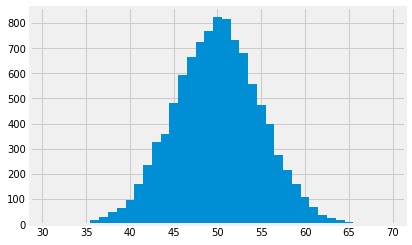

In [15]:
# Again, don't worry about the details here.
plt.hist(head_counts, bins=np.arange(30.5, 69.6, 1));

Not surprisingly, the histogram looks roughly symmetric around 50
heads. The height of the bar at 50 is about 8% per unit. Since each
bin is 1 unit wide, this is the same as saying that about 8% of the
repetitions produced exactly 50 heads. That's not a huge percent, but
it's the largest compared to the percent at every other number of
heads.

The histogram also shows that in almost all of the repetitions, the
number of heads in 100 tosses was somewhere between 35 and 65. Indeed,
the bulk of the repetitions produced numbers of heads in the range 45
to 55.

While in theory it is *possible* that the number of heads can be
anywhere between 0 and 100, the simulation shows that the range of
*probable* values is much smaller.

This is an instance of a more general phenomenon about the variability
in coin tossing, as we will see later in the course.

Now see [the for loop exercises](../exercises/for_loops).

{% data8page Iteration %}